In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import SpectralCoclustering
from sklearn.datasets import make_blobs
from anti_clustering import ExactClusterEditingAntiClustering
from sklearn import datasets
import pandas as pd
from pathlib import Path

import os
import glob2

In [2]:
p = 2
k = 4
part_m = 'f'
inst_name = 'ruspini'

In [8]:
file = '\\\wsl.localhost\\Ubuntu-22.04\\home\\aelle\\mr-sos-dp\\instances\\anticlust\\ruspini_2.txt'
color_map = ["r", "g", "b", "y", "m", "c", "k", "orange", "purple", "pink", "gray", "olive", "brown"]
marker_map = ["o", "<", ">", "D", "*", ".", ",", "v", "^"]
part = np.loadtxt(file, usecols=0).astype(int)
point = np.loadtxt(file, usecols=1).astype(int)
data = np.loadtxt(file, usecols=range(2,4))
cls = np.loadtxt(file, usecols=4).astype(int)
n = point.shape[0]
for p in np.unique(part):
    j = np.where(part == p)
    plt.scatter(data[j,0], data[j,1], s=20, c=color_map[p], label=p)
file = Path(file).stem
plt.title(file)
# plt.legend(np.unique(part))
plt.savefig(file + ".png", bbox_inches='tight')
plt.show()

print('Done!')

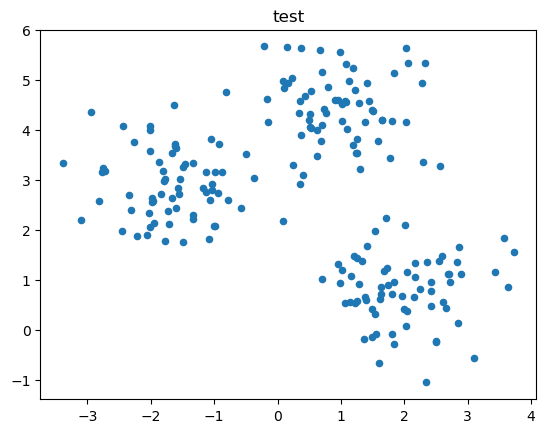

In [9]:
X, y_true = make_blobs(n_samples=200, centers=k, cluster_std=0.7, random_state=0)

plt.title("test")
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.show()

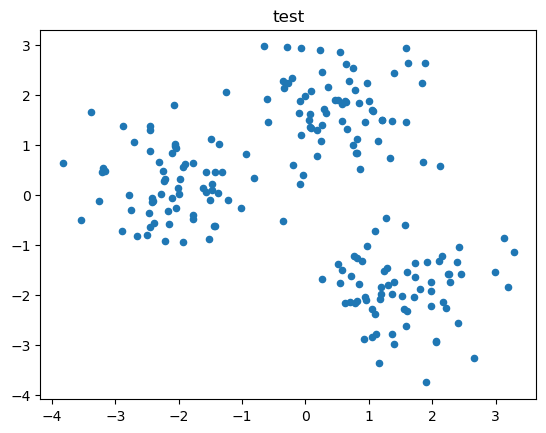

In [11]:
centroid = np.mean(X, axis=0)
X2 = X - centroid
#dist2 = np.max(dist) - dist
#X2 = X + np.expand_dims(dist, axis=1)

plt.title("test")
plt.scatter(X2[:, 0], X2[:, 1], s=20)
plt.show()

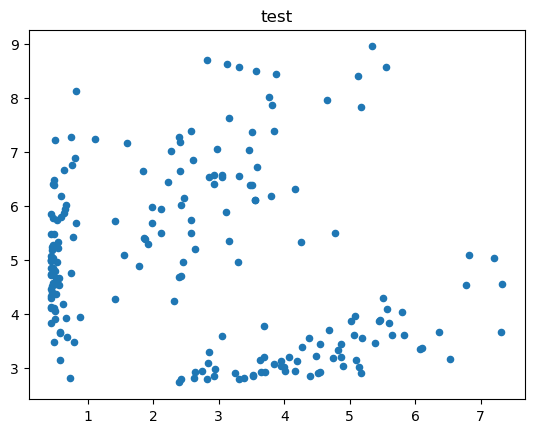

In [10]:
centroid = np.mean(X, axis=0)
dist = np.linalg.norm(X - centroid, axis=1)
#dist2 = np.max(dist) - dist
X2 = X + np.expand_dims(dist, axis=1)

plt.title("test")
plt.scatter(X2[:, 0], X2[:, 1], s=20)
plt.show()

In [ ]:
iris_data = datasets.load_iris(as_frame=True)
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

algorithm = ExactClusterEditingAntiClustering()

df = algorithm.run(
    df=iris_df,
    numerical_columns=list(iris_df.columns),
    categorical_columns=None,
    num_groups=2,
    destination_column='Cluster'
)

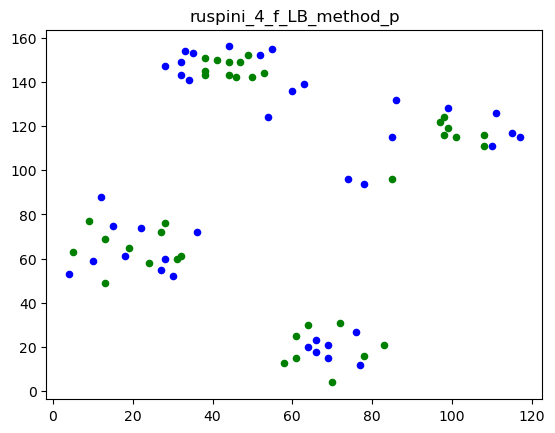

Done!


In [14]:
result_path = os.getcwd() + '\\instances\\results\\' + str(p) + "part\\" + inst_name + '_' + str(k) + "\\"
result_path = '\\\wsl.localhost\\Ubuntu-22.04\\home\\aelle\\mr-sos-dp\\instances\\results\\' + str(p) + "part\\" + inst_name + '_' + str(k) + "\\"
color_map = ["r", "g", "b", "y", "m", "c", "k", "orange", "purple", "pink", "gray", "olive", "brown"]
marker_map = ["o", "<", ">", "D", "*", ".", ",", "v", "^"]
if os.path.exists(result_path):
    for file in glob2.glob(result_path + "*.txt"):
        if ("LB" in str(file)) and (("_" + part_m) in str(file)):
            part = np.loadtxt(file, usecols=0).astype(int)
            point = np.loadtxt(file, usecols=1).astype(int)
            data = np.loadtxt(file, usecols=range(2,4))
            cls = np.loadtxt(file, usecols=4).astype(int)
            n = point.shape[0]
            for p in np.unique(part):
                j = np.where(part == p)
                plt.scatter(data[j,0], data[j,1], s=20, c=color_map[p], label=p)
            file = Path(file).stem
            plt.title(file)
            # plt.legend(np.unique(part))
            plt.savefig(result_path + file + ".png", bbox_inches='tight')
            plt.show()

print('Done!')

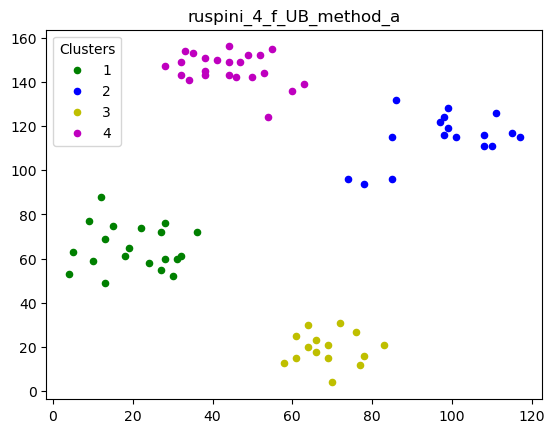

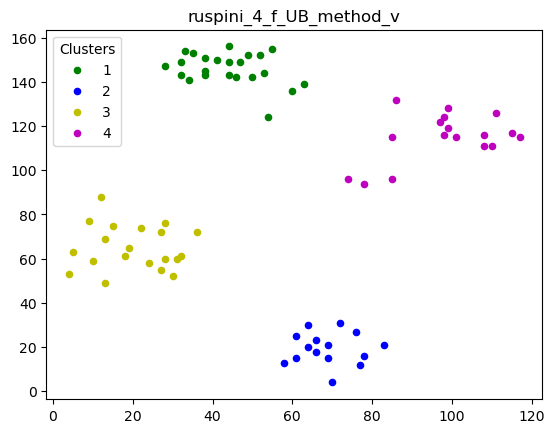

Done!


In [10]:
result_path = os.getcwd() + '\\instances\\results\\' + str(p) + "part\\" + inst_name + '_' + str(k) + "\\"
result_path = '\\\wsl.localhost\\Ubuntu-22.04\\home\\aelle\\mr-sos-dp\\instances\\results\\' + str(p) + "part\\" + inst_name + '_' + str(k) + "\\"
color_map = ["r", "g", "b", "y", "m", "c", "k", "orange", "purple", "pink", "gray", "olive", "brown"]
marker_map = ["o", "<", ">", "D", "*", ".", ",", "v", "^"]
if os.path.exists(result_path):
    for file in glob2.glob(result_path + "*.txt"):
        if "UB" in str(file):
            part = np.loadtxt(file, usecols=0).astype(int)
            point = np.loadtxt(file, usecols=1).astype(int)
            data = np.loadtxt(file, usecols=range(2,4))
            cls = np.loadtxt(file, usecols=4).astype(int)
            n = point.shape[0]
            for k in np.unique(cls):
                j = np.where(cls == k)
                plt.scatter(data[j,0], data[j,1], s=20, c=color_map[k], label=k)
            file = Path(file).stem
            plt.title(file)
            plt.legend(title="Clusters")
            plt.savefig(result_path + file + ".png", bbox_inches='tight')
            plt.show()

print('Done!')